## Chapter 9: plotting and visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
%matplotlib inline
# %matplotlib widget

Realizar visualizaciones informativas (gráficos) es una de las tareas más importantes en el análisis de datos. Puede ser parte del proceso
explotatorio, por ejemplo, para ayudar a identificar valores atípicos o transformaciones de datos necesarios, o como una forma de generar ideas
para modelos.

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

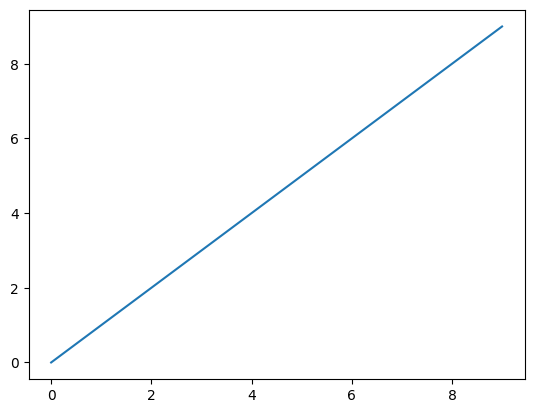

In [3]:
plt.plot(data);

### Figuras y subplots

Los gráficos en matplotlib residen dentro de un objeto `Figure`. Puede crear nuevas figuras con `plt.figure`:

In [4]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

En IPython, si corre por primera vez `%matplotlib` para configurar la integración de matplotlib, aparecerá una ventana de trazado vacía, pero
en Jupyter no se motrará nada hasta que usemos algunos comandos más.

`plt.figure` tiene una serie de opciones; en particular, `figsize` garantizará que la figura tenga cierto tamaño y relación de aspecto si se guarda
en el disco.

Puede hacer un trazado con una figura en blanco. Tiene que crear uno o más `subplots` usando `add_subplot`:

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

Esto significa que la cifra debe ser de 2 x 2 (hasta cuatro parcelas en total, y weisre seleccionara la primera de las cuatros subplots (numeradas
de uno 1).

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Ejecutar los comandos en una misma celda:

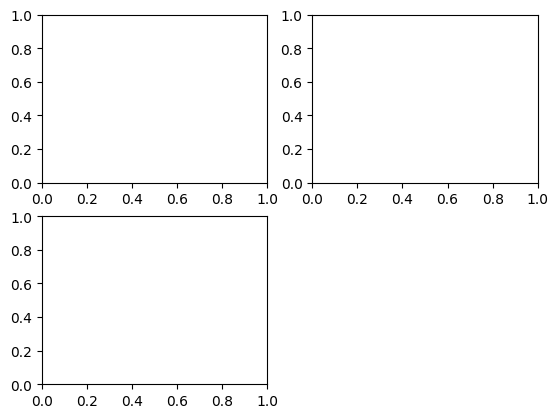

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Ejemplo, hacer un trazado de línea con el método `plot`:

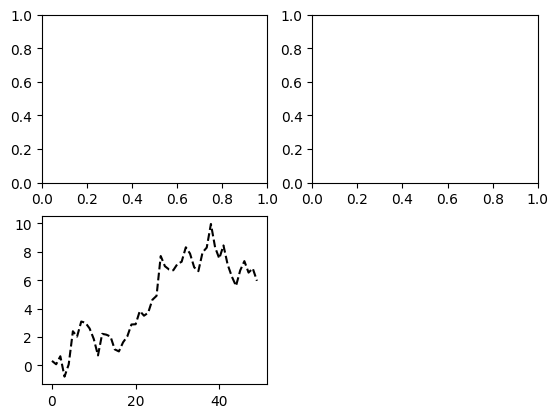

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed"); # el punto y coma suprime la línea de salida

Las opciones adicionales instruyen a matplotlib para trazar una línea discontinua negra. Los objetos devueltos por `fig.add_subplot` son
`AxesSubplot`, en los que puede trazar directamente en los otros subplots vacías llamando el método de instancia de cada una:

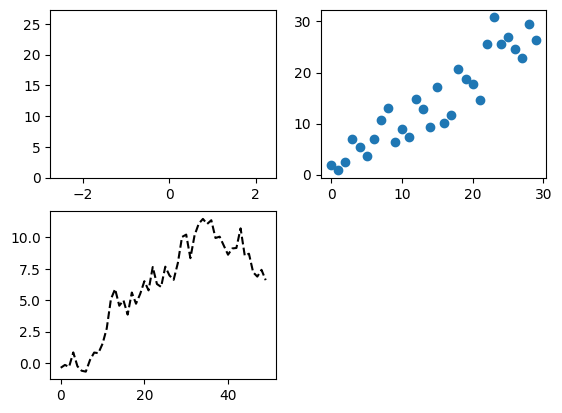

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.standard_normal(100), color="black", alpha=0);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed");

La opción de estilo `alpha=0.3` establece la transparencia de trazado superpuesta.

Para hacer que la creación de una cuadrícula de subplot sea más conveniente, matplotlib incluye un método `plt.subplots` que crea una nueva
figura y devuelve una matriz NumPy que contiene los objetos de subplots creados:

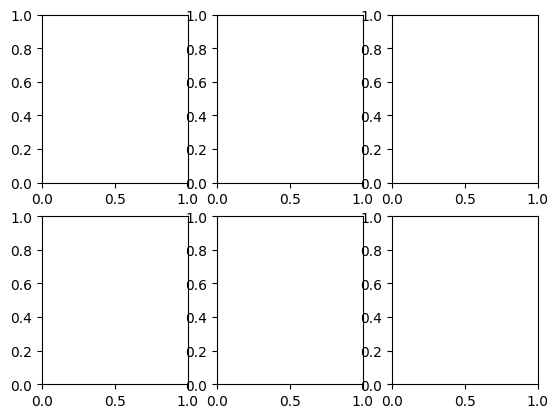

In [10]:
fix, axes = plt.subplots(2, 3)
axes;

La matriz `axes` se puede indexar como una matriz bidimensional; por ejemplo, `axes[0, 1]` se refiere al subplot en la fila superior en el centro.
También puede indicar que los subplots deben tener el mismo eje x o y usando `sharex` y `sharey`, respectivamente. Esto puede ser útil cuando
compara datos en la misma escala; de lo contrario, usará los límites de plot de autoescala de forma independiente.

### Ajustar el espacio alrededor de los subplots
Por defecto, matplotlib deja una cierta cantidad de relleno alrededor del exterior de los subplots y en el interior de los subplots. Este espacio
se especifica en la relación con la altura y el ancho de la gráfica, de modo que si cambia el tamaño de la gráfica de forma prográmatica o manual
utilizando la ventana GUI, la trama se ajustará dinámicamente. Puede cambiar el espacio usando el método `subplots_adjust` de `Figure`:

```py
subplots_adjust(left=None, bottom=None, right=None,
    top=None, wspace=None, hspace=None)
```

`wspace` y `hspace` controla el porcentaje del ancho y el alto de la figura. Ejemplo donde reduce el espacio hasta cero:

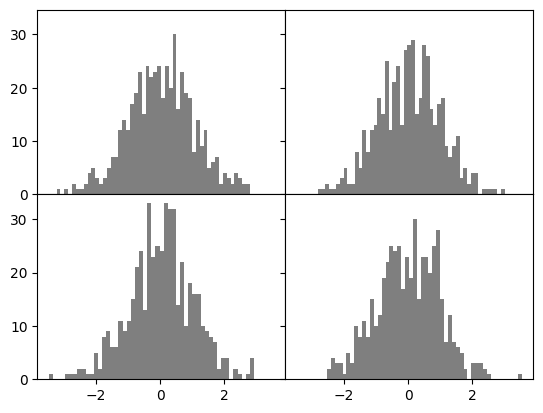

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                       color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

Puede notar que las etiquetas de los ejes se superponen. matplotlib no verifica si las etiquetas se superponen, y, entonces, en un caso como este,
debería areglas las etiquetas usted mismo especificando ubicaciones de marca explícitas y etiquetas de marca

### Colores, marcadores y estilos de línea
La función de línea de matplotlib `plot` acepta matrices de coordenadas x e y y opciones de estilo de colores opcionales. Por ejemplo, para trazar
`x` versus `y` con guiones verdes, ejecutaría:

```py
ax.plot(x, y, linestyle="--", color="green")
```

Se proporcionar varios nombres de colores para los colores utilizados habitualmente, pero puede utilizar cualquier color del espectro especificando su código
hexadecimal (p. ej., `"#CECECE"`).

Los gráficos de líneas también pueden tener marcadores para resaltar los puntos de datos reales. Dado que la función de matplotlib `plot` crea un gráfico
de líneas continuas, interpolando entre puntos, en ocasiones puede no estar claro dónde se encutran los puntos. El marcador se puede suminstrar como
una opción de estilo adicional:

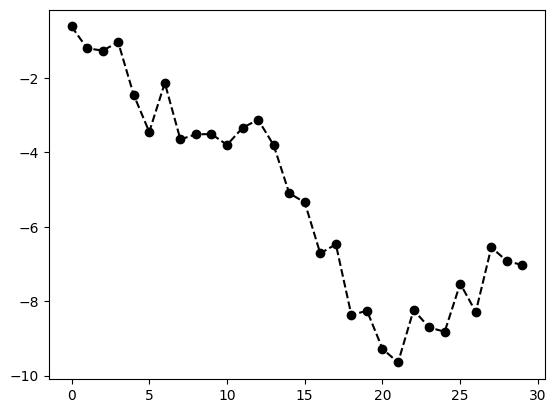

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
       linestyle="dashed", marker="o");

Para los gráficos de líneas, observará que los puntos subsiguientes se interpolan linealmente de forma predeterminado. Esto se puede modificar con la
opción `drawstyle`:

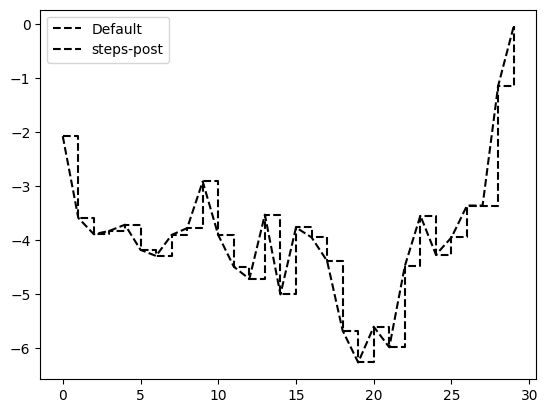

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
# same
# fig, ax = plt.subplots()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
       drawstyle="steps-post", label="steps-post");
ax.legend();

Aquí, dado que le pasamos los `label` argumentos a `plot`, podemos crear una leyenda de la trama para identificar cada línea usando `ax.legend`.

### Ticks, etiquetas y leyendas
Se puede acceder a la mayoría de los tipos de decoreaciones de gráficos a través de métodos en objetos de ejes matplotlib. Esto incluye métodos como
`xlim`, `xticks` y `xticklabels`. Esto controla el rango de trazado, las ubicaciones de las marcas y las etiquetas de las marcas, respectivamente.
Se pueden utilizar de dos maneras:
- Llamado sin argumetnos devuelve el valor del parámetro actual (p. ej., `ax.xlim()` devuelve el rango de trazado actual del eje x).
- Llamado con parámetos establece el valor de parámetro (p. ej., `ax.xlim[0, 10]` establece el rango del eje x de 0 a 10).

Todos estos métodos actúan sobre los activos o los creados más recientemente `AxesSubplot`. Cada uno corresponde a dos métodos en el propio
objeto de la subtrama; en el caso de `xlim`, estos son `ax.get_xlim` y `ax.set_xlim`.

### Configuración del título, etiquetas de eje, ticks y etiquetas de ticks
Ejemplo:

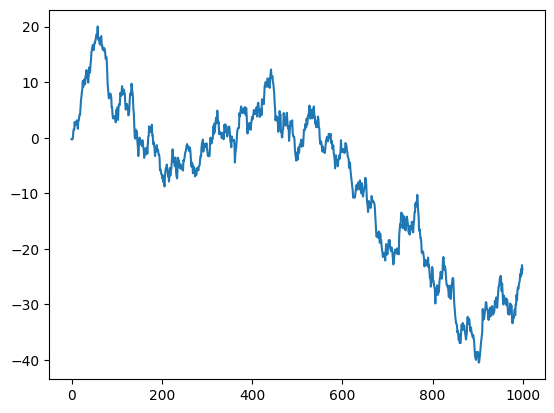

In [14]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

Para cambiar los ticks del eje x, es más fácil usar `set_xticks` y `set_xticklabels`. El primero indica a matplotlib dónde colocar las marcas a lo largo
del rango de datos; de forma predeterminada, estas ubicaciones también serán las etiquetas. Pero podemos establecer cualquier otro valor como etiquetas
usando `set_xticklabels`:

In [15]:
ticks = ax.set_xticks([0, 250, 500, 700, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)

La opción `rotation` establece las etiquetas de marca x en una rotación de 30 grados Por último, `set_title` es el título de la trama secundaria:

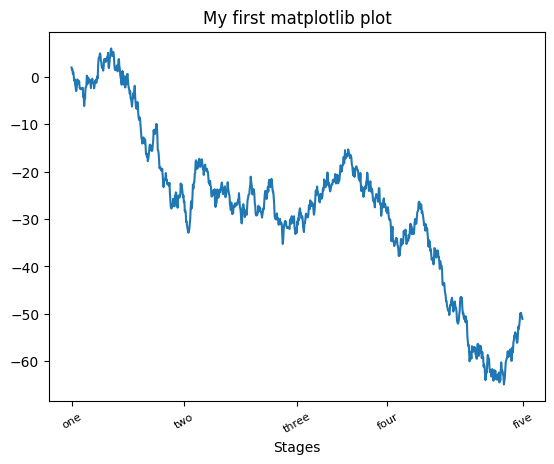

In [16]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 700, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)
ax.set_xlabel("Stages")
#ax.text(0.5, 0, 'Stages')
ax.set_title("My first matplotlib plot");

Modificar el eje y consiste en el mismo proceso, sustituyendo `y` en `x`. La clase de ejes tiene un método `set` que permite la configuración por lotes de
propiedades de trazado. Del ejemplo anterior, también podríamos hacer escrito:

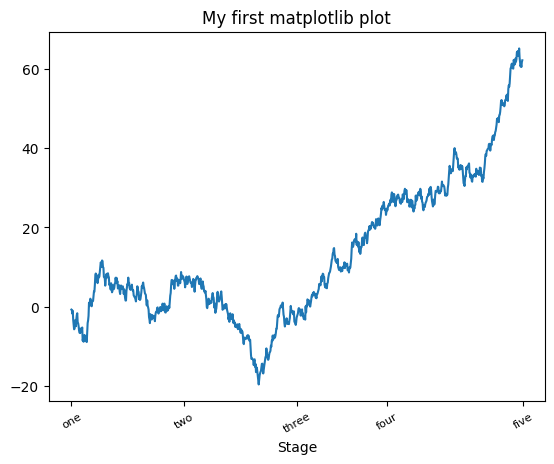

In [17]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 700, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)
ax.set(title="My first matplotlib plot", xlabel="Stage");

### Agregar leyendas
Las leyendas son otro elemento crítico para identificar los elementos de la trama. Hay un par de formar de agregar uno. Lo más fácil es pasar el
arguemento `label` al agregar cada parte de la trama:

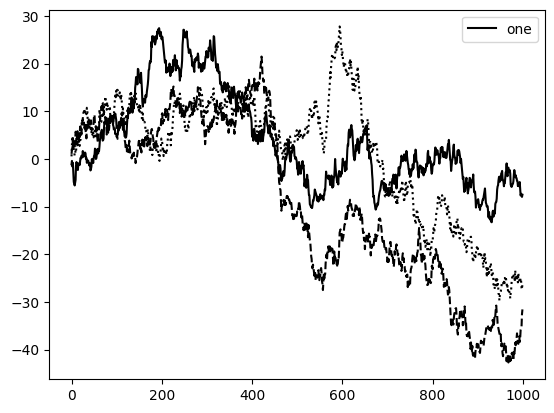

In [18]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted");
ax.legend();

El método `legend` tienen varias otras opciones para el argumento `loc` de ubicación.

La opción `loc` de leyenda le dice a matplotlib dónde colocar el gráfico. El valor predeterminado es `"best"`, que intenta elegir una ubicación
que esté más alejada. Para excluir uno o más elementos de la leyenda, no pase ninguna etiqueta o `label="_lolegend_`.

### Anotaciones y dibujo en una trama secundaria
Además de los tipos de trazado estándar, es posible que desee dibujar sus propias anotaciones de trazado, que puede consistir en texto, flechas u
otras formas. Puede agregar anotaciones y texto usando la función `text`, `arrow` y `annotate`. `text` dibuja texto en coordenadas dadas `(x, y)`
en el gráfico con un estilo personalizado opcional:

```py
ax.text(x, y, "Hello world!", family="monospace", fontsize=10)
```

Las anotaciones pueden dibujar tanto texto como flechas dispuestas adecuadamente.

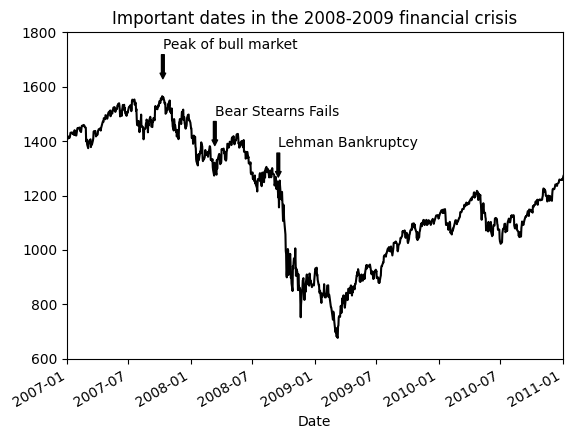

In [19]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
             arrowprops=dict(facecolor="black", headwidth=4, width=2,
                            headlength=4),
             horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis");

Para agregar una forma a una gráfica, cree el objeto de parche y agréguelo a una subtrama `ax` pasando el parche a `ax.add.patch`:

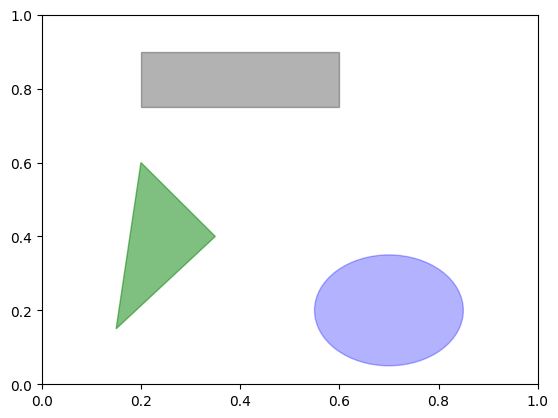

In [20]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);

### Guardar trazos en un archivo
Puede guardar la figura activa en un archivo utilizando el método `savefig` de instancia del objeto de figura. Por ejemplo, para guardar
una versión SVG de una figura:

```py
fig.savefig("figpath.svg")
```

El tipo de archivo se infiere de la extensión del archivo. Entonces, si lo usaras en `.pdf` en su lugar, obtendrías un PDF. Una opción importante
para publicar gráficos es `dpi`, que controla la resolución de puntos por pulgadas. Para obtener el mismo trazado que un PNG a 400 DPI:

```py
fig.savefig("figpath.png", dpi=400)
```

### Configuración de matplotlib
matplotlib viene configurado con esquemas de color y valores predeterminados que están orientados principalmente a preparar figuras para su publicación.
Afortunadamente, casi todo el comportamiento predeterminado se puede personalizar mediante parámetros globales que rigen el tamaño de la
figura, el espacio de la trama secundaria, los colores, los tamaños de fuente, los estilos de cuadrícula, etc. Una forma para modificar la configuración
mediante programación desde Python es utilizar el método `rc`;
por ejemplo, para establecer el tamaño de la figura predeterminado global en 10 x 10, puede ingresar:

In [21]:
plt.rc("figure", figsize=(10, 10))

Todos los ajustes de configuración actuales se encuentran en el diccionario `plt.rcParams` y se pueden retaurar a sus valores predeterminados
llamando a la función `plt.rcdefault()`.

El primer argumento `rc` es el componente que desea personalizar, como `"figure"`, `"axes"`, `"xtick"`, `"ytick"`, `"grid"`, `"legen"`, etc. Después
de eso puede seguir una secuencia de argumentos de palabra clave que indican los nuevos parámetros. Una forma comoda de anotar las opciones de un programa
es mediante un diccionario:

In [22]:
plt.rc("font", family="monospace", weight="bold", size=8)

Para una personalización más amplia y ver una lista de todas las opciones, matplotlib viene con un archivo de configuración _matplotlibrc_ en el
directorio _matplotlib/mpl-data_. Si personaliza este archivo y lo coloca en un directorio de inicio titulado _.matplotlibrc_, se cargará cada vez
que use matplotlib.

### Plotting con pandas y seaborn
matplotlib puede ser una herramienta de nivel bastanta bajo. Usted ensambla un gráfico a partir de sus componentes básicos: la visualización de datos
(i.e., el tipo de gráfico: línea, barra, cuadrado, dispersión, contorno, etc.), leyenda, título, etiquetas de marca y otras anotaciones.

En pandas, podemos tener varias columnas de datos, junto con etiquetas de filas y columnas. El propio pandas tiene métodos integrados que simplifican
la cración de visualizaciones a partir de objetos DataFrame y Series. Otra biblioteca es seaborn, una biblioteca de gráficos estadístico de alto nivel
construida sobre matplotlib. seaborn simplifica la creación de muchos tipos de visualización comunes.

### Gráficos de líneas
Series y DataFrame tienen un atributo `plot` para crear algunos tipos de gráficos básicos. De forma predeterminada, `plot()` realiza gráficos de líneas:

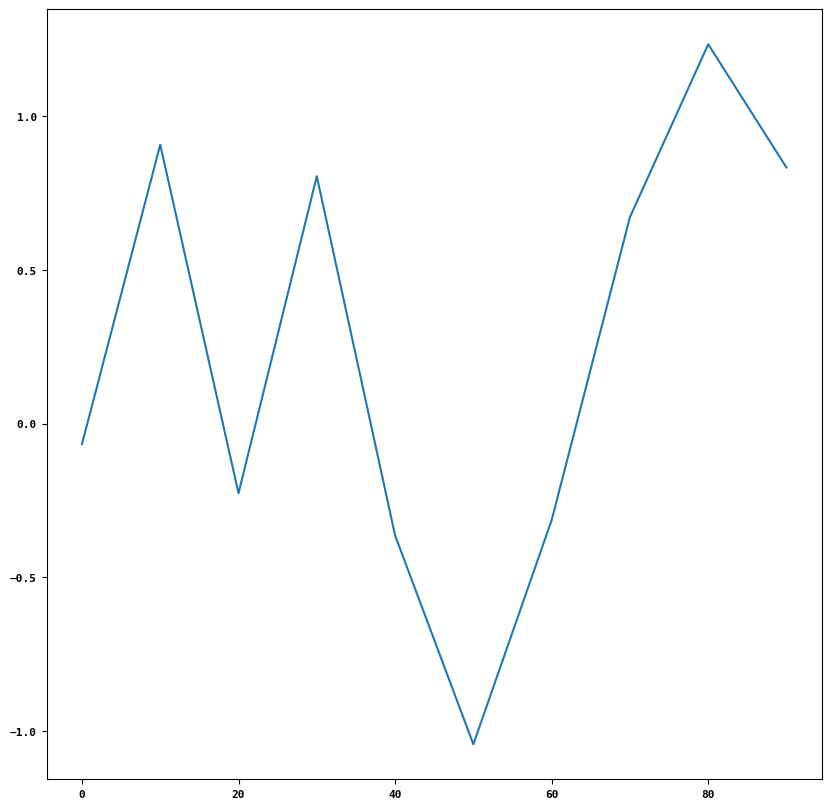

In [23]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0,100,10))
s.plot();

El índice del objeto Series se pasa a matplotlib para trazar en eje x, aunque puede desactivarlo pasando `use_index=False`. Los ticks y límites
de ejes x se pueden ajustar con las opciones `xticks` y `xlim`, y el eje y respectivamente con `ystick` y `ylim`.

La mayoría de los métodos de trazado de pandas aceptan un parámetro `ax` opcional, puede ser un objeto de subtrama matplotlib Esto le brinda una
ubicacón más flexible de las subtramas en un diseño de cuadrícula.

El método de DataFrame `plot` traza cada una de sus colmnas como una línea diferente en el mismo subtrama, creando una leyenda automáticamente:

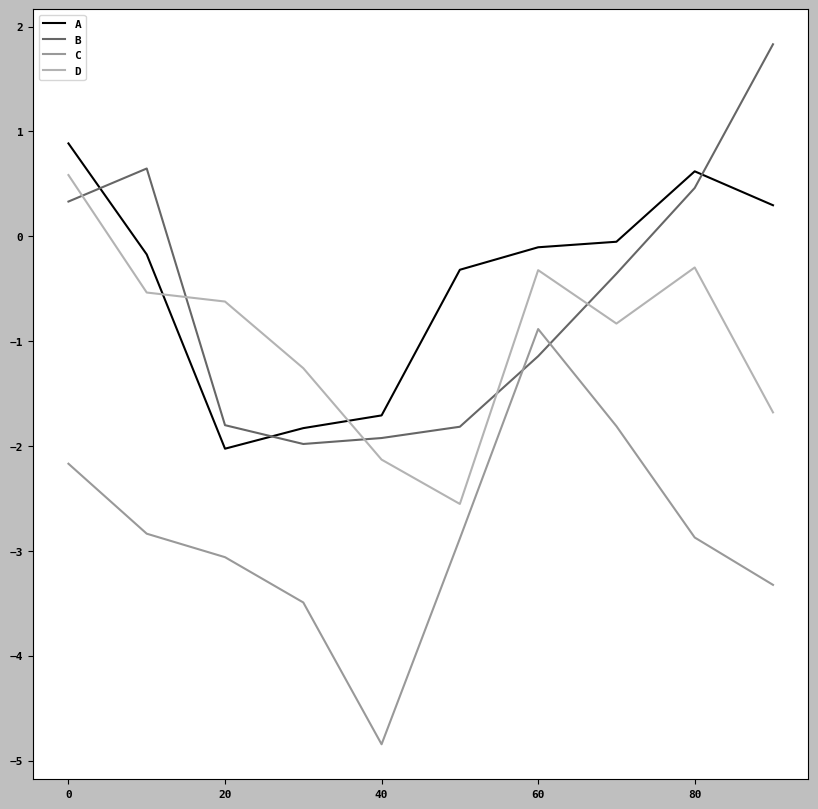

In [24]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                 columns=["A", "B", "C", "D"],
                 index=np.arange(0, 100, 10))
plt.style.use("grayscale")
df.plot();

### Parcelas de barras
Los `plot.bar()` y `plot.barh()` hacen gráficos de barras verticales y horizontales. En este caso, el índice de Series y DataFrame se utilizará como
los ticks x `bar` o y `barh`:

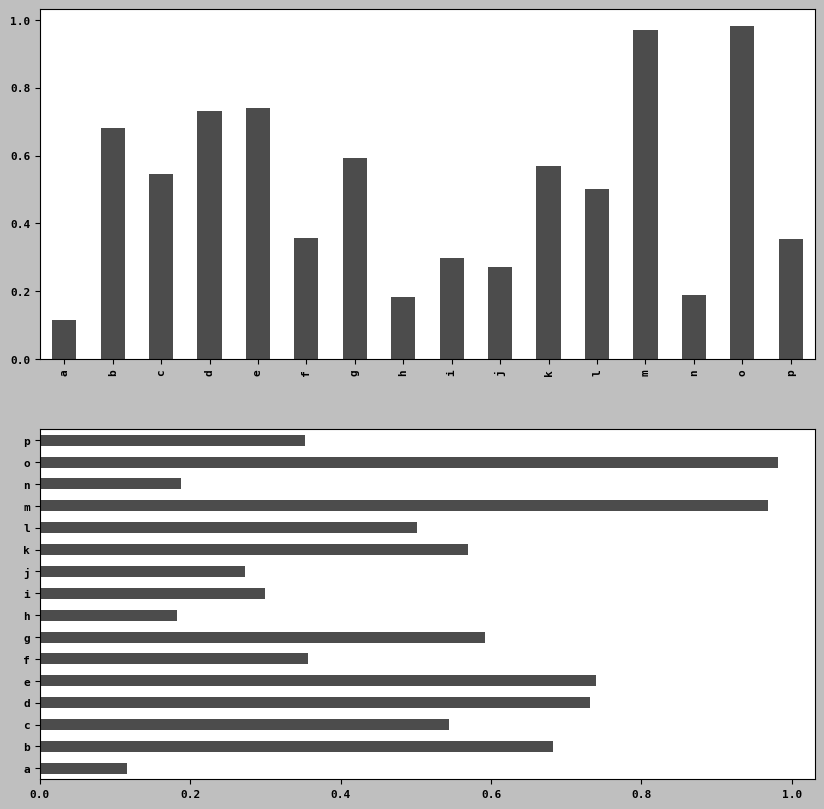

In [25]:
fig, ax = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=ax[0], color="black", alpha=0.7)
data.plot.barh(ax=ax[1], color="black", alpha=0.7);

Con un DataFrame, los gráficos de barras agrupan los valores de cada fila en barras una a lado de la otra, para cada valor:

In [26]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                                   index=["one", "two", "three", "four", "five", "six"],
                                   columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.411832,0.629402,0.076400,0.588971
two,0.617958,0.469242,0.390506,0.540064
three,0.035531,0.411411,0.943313,0.524492
four,0.480957,0.155242,0.405692,0.941178
five,0.021218,0.915613,0.493523,0.458300
six,0.176615,0.071835,0.465047,0.239193


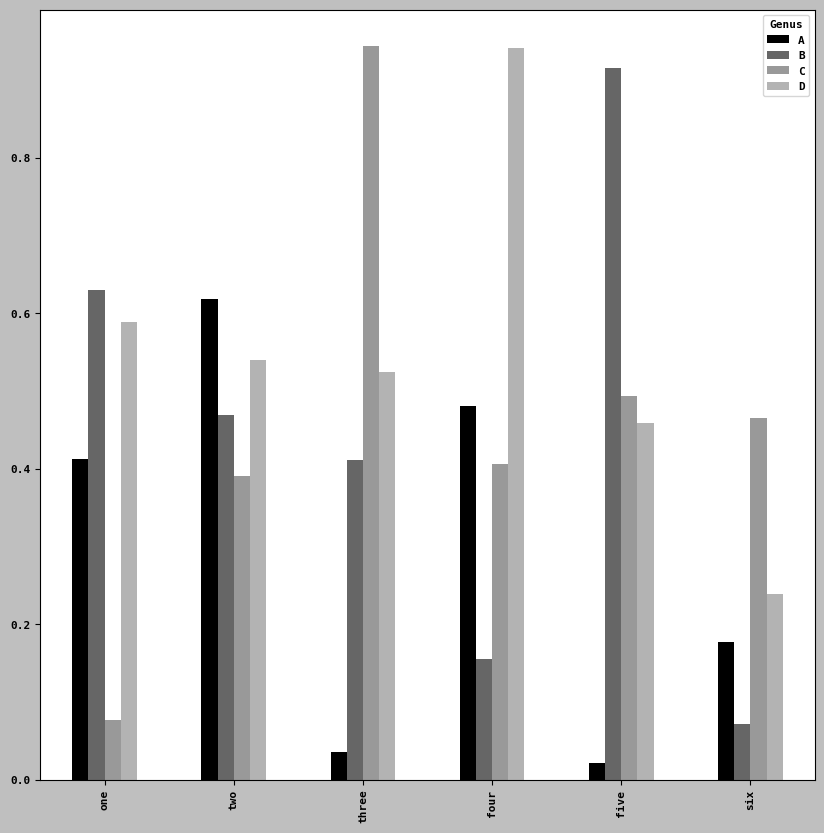

In [27]:
df.plot.bar();

Tenga en cuneta que el nombre "Genero" en las columnas del DataFrame se utiliza para titular la leyenda.

Creamos gráficos de barras apiladas a partir de un DataFrame pasando `stacked=True`, lo que da como resultado que el valor de cada fila se apile
horizontalmente:

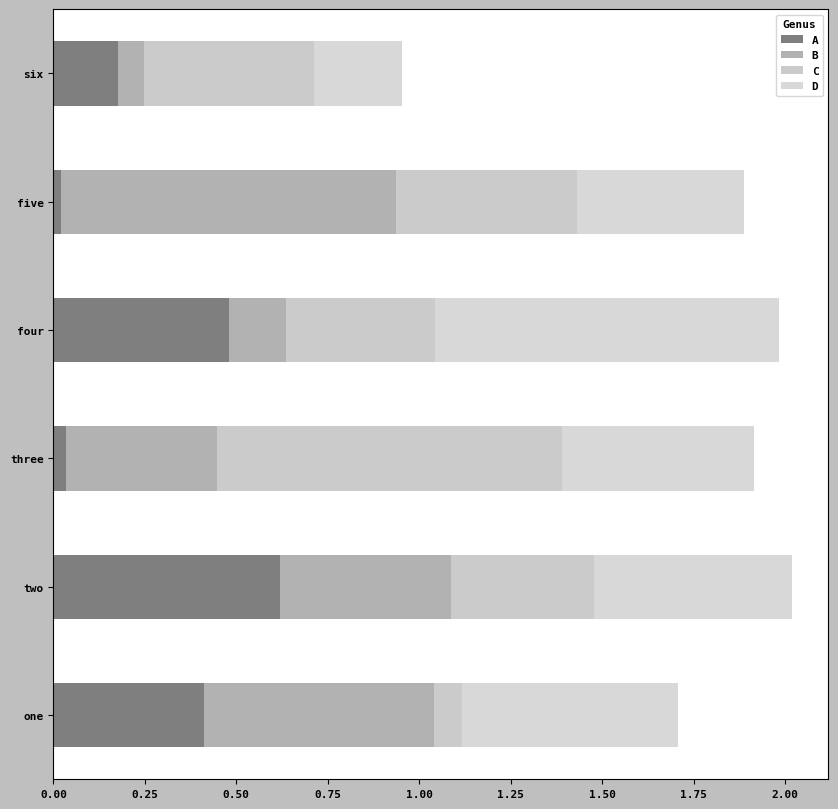

In [28]:
df.plot.barh(stacked=True, alpha=0.5);

Supongamos que queremos hacer un diagrama de barras apiladas que muestre el porcentaje de puntos de datos para cada tamaño de grupo para cada día.
La función `pd.crosstab` es una forma conveniente de calcular una tabla de frecuencia simple a partir de dos columnas de DataFrame:

In [29]:
tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [30]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


Eliminar grupos de una y seis persona (no son frecuentes):

In [31]:
party_counts = party_counts.loc[:, 2:5]

Normalizar para que cada fila sume 1 y haga cada gráfica:

In [32]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                               axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


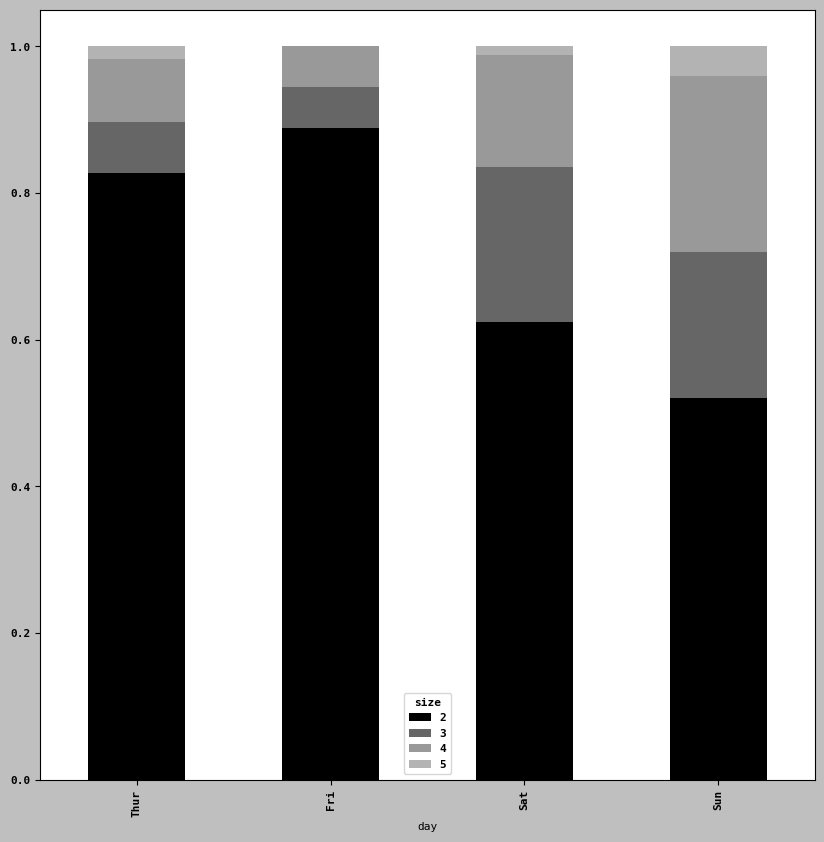

In [33]:
party_pcts.plot.bar(stacked=True);

Entonces puede ver que el tamaño de los grupos parace aumentar durante el fin de semana en este conjunto de datos.

Con datos que requieren agregación o resumn antes de ralizar un gráfico, usar el paquete seaborn puede simplificar las cosas.

In [34]:
!{sys.executable} -m pip install seaborn

In [35]:
import seaborn as sns

In [36]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


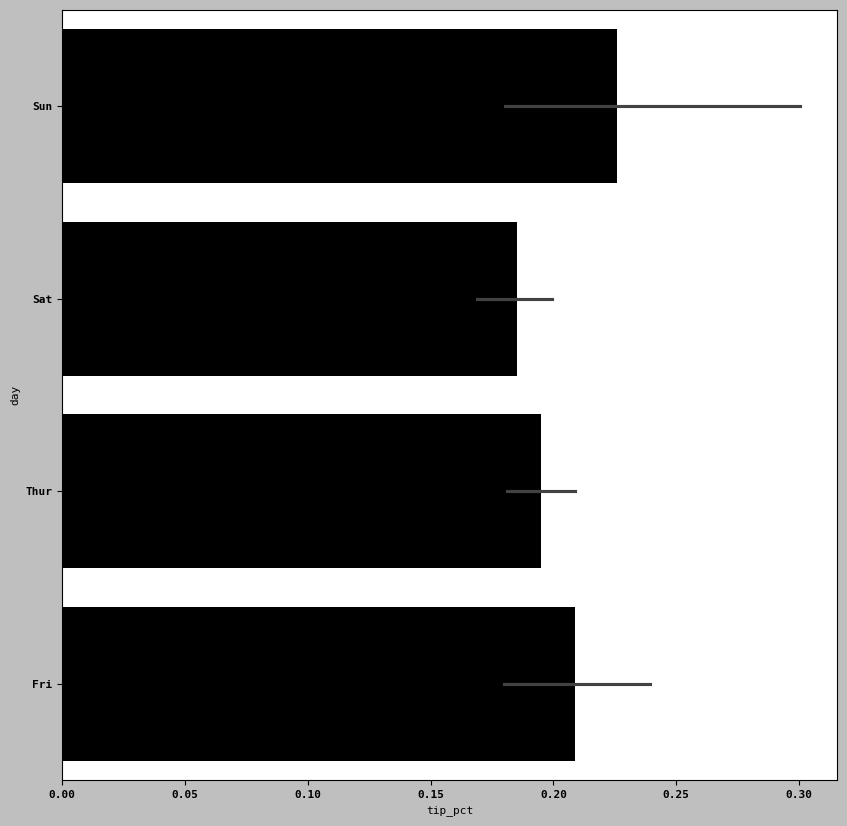

In [37]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h");

Las funciones de trazado en seaborn toman un argumento `data`, que puede ser un DataFrame de pandas. Los otros argumentos se refieren a nombres de columnas.
Debido a que hay múltiples observasiones para cada valor en `day`, las barras son el valor promedio de `tip_pct`. Las líneas negras dibujadas en las barras
representan el intervalo de confianza del 95 % (esto se puede configurar mediante arguementos opcionales.

`sns.barplot` tiene una opción `hue` que nos permite dividir por un valor categórifo adicional:

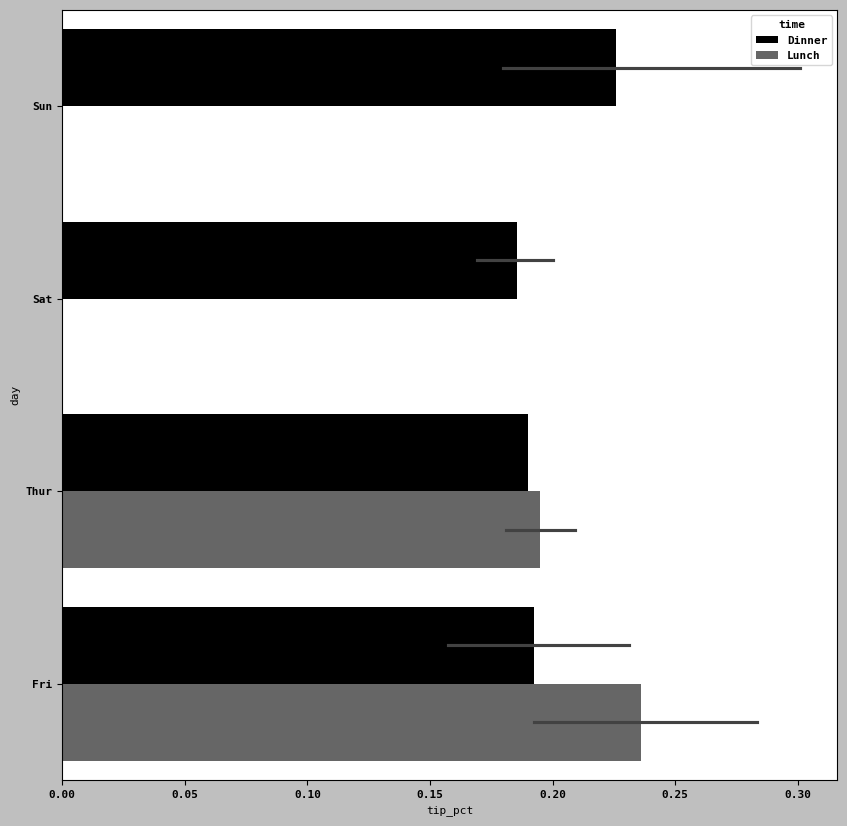

In [38]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h");

Tenga en cuenta que seaborn ha cambiado automáticamente la estética de los gráficos: la paleta de colores predetermanda, el fondo del trazado y
los colores de las líneas de la cuadrícula. Puede cambiar entre diferentes apariencias de la trama usando `sns.set_style`:

In [39]:
sns.set_style("whitegrid")

Al reproducir trazado para un medio de impresión en blanclo y negro, puede resultarle útil establecer una paleta de colores en escala de grises, como esta:

In [40]:
sns.set_palette("Greys_r")

### Histogramas y gráficos de densidad
Un _histograma_ es una especie de diagrama de barras que ofrece una visualización discretizada de la frecuencia del valor. Los puntos de datos se dividen
en contenedores discretos y espacio uniformemente, y se traza el número de puntos de datos en cada contenedor. Usando los datos de propinas anteriores, podemos
hacer un histograma de porcentahes de propinas de la factura total uando el método `plot.hist` de la Serie:

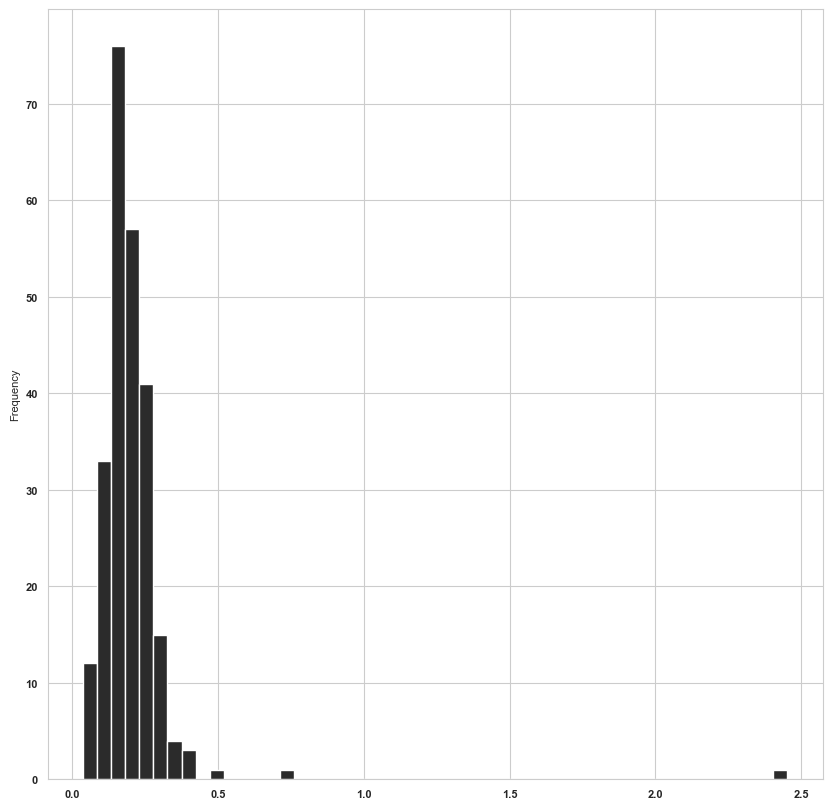

In [41]:
tips["tip_pct"].plot.hist(bins=50);

Un tipo de gráfico relacionado es un _gráfico de densidad_, que se forma calculando una estimación de una distribución de probabilidad continua que
podría haber generado los datos observados. El procedimiento habitual es aproximar estra distribución como una mezcla de "núcleos", es decir,
distribuciones más simples como la distribución normal. Por lo tanto, los gráficos de densidad también se conocen cmo gráficos de estimación de densidad
del núcleo (KDE). El uso `plot.density` crea un gráfico de densidad utilizando la estimación de mezcla de normales convencional:

In [42]:
!{sys.executable} -m pip install scipy

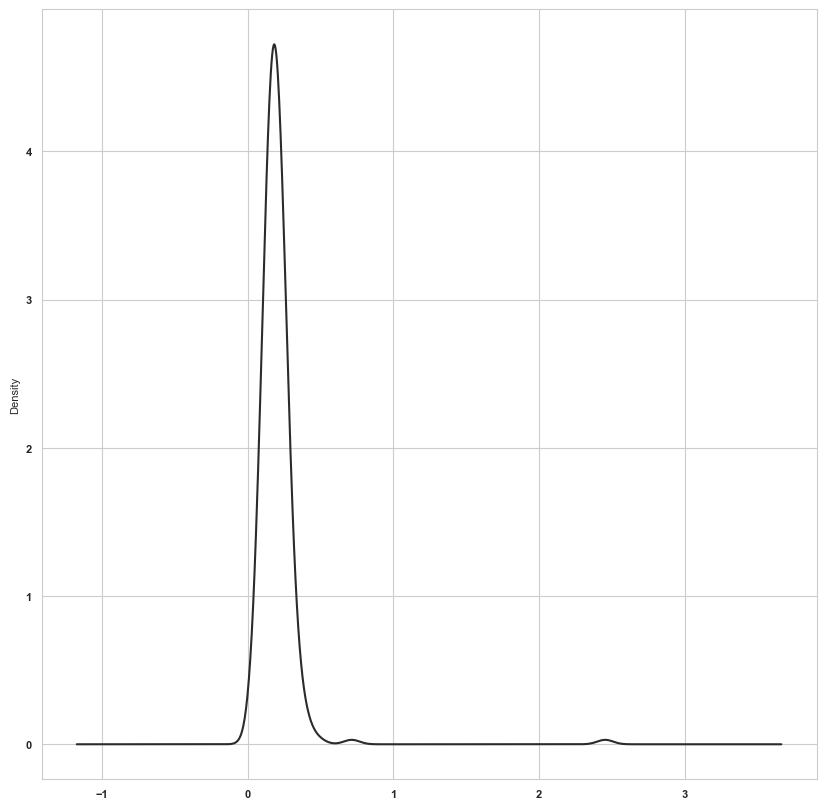

In [43]:
tips["tip_pct"].plot.density();

seaborn facilita aún más los histogramas y los gráficos de densidad a través de su método `histplot`, que puede trazar simultáneamente un histograma
y una estimación de densidad continua. Como ejemplo, considere una distribución bimodal que consta de extracción de dos distribuciones normales
estándar diferentes:

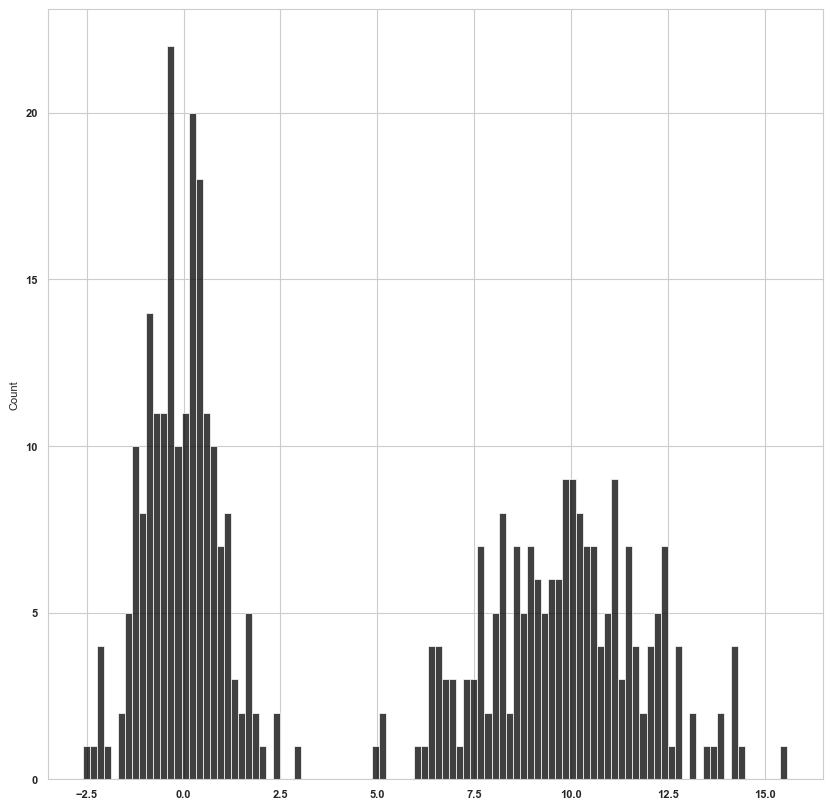

In [44]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color="black");

### Gráficos de dispersión o de puntos
Los diagramas de puntos o los diagramas de dispersión pueden ser una forma útil de examinar la relación entre dos series de datos unidimensionaes.
Por ejemplo:

In [45]:
macro = pd.read_csv("macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Usar el método `regplot` de seaborn, que crea un diagrama de dispersión y ajusta una línea de regresión lineal:

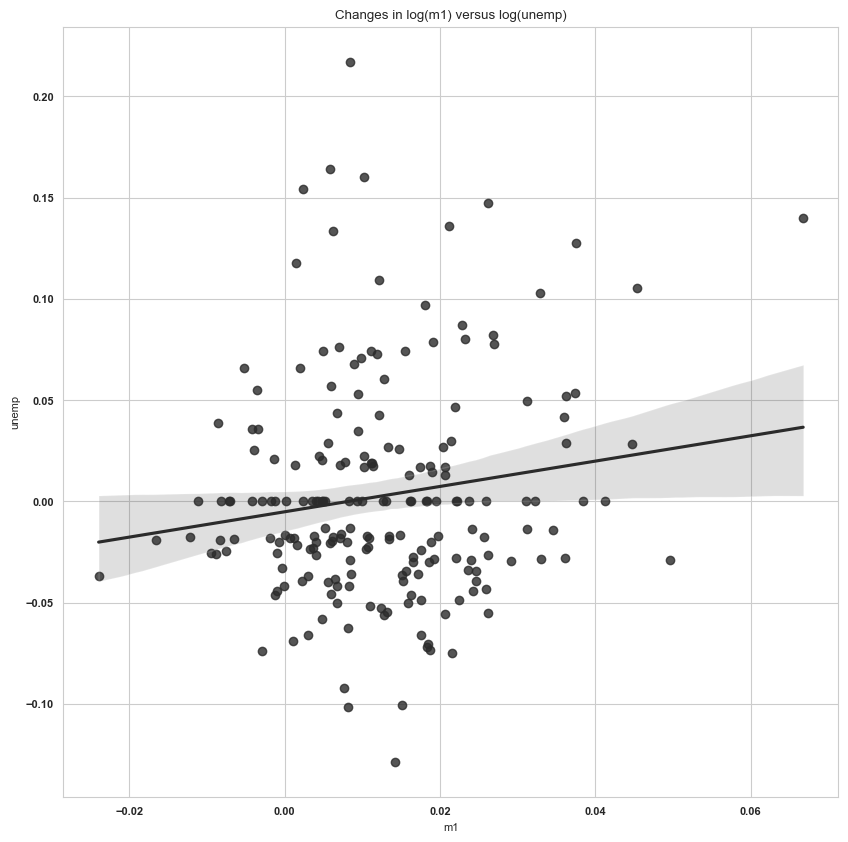

In [46]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)");

En en análisis de datos exploratorio, resulta útil poder observar todos los diagramas de dispersión entre un grupo de variables; esto se conoce
como una matriz de diagrama de _pares_ o _diagrama de dispersión_. Hacer un gráfico de este tipo desde cero requiere un poco de trabajo, por lo que
seaborn tiene una función `pairplot` conveniente que admite la colocación de histogramas o estimación de densidad de cada variable a lo
largo de la diagonal:

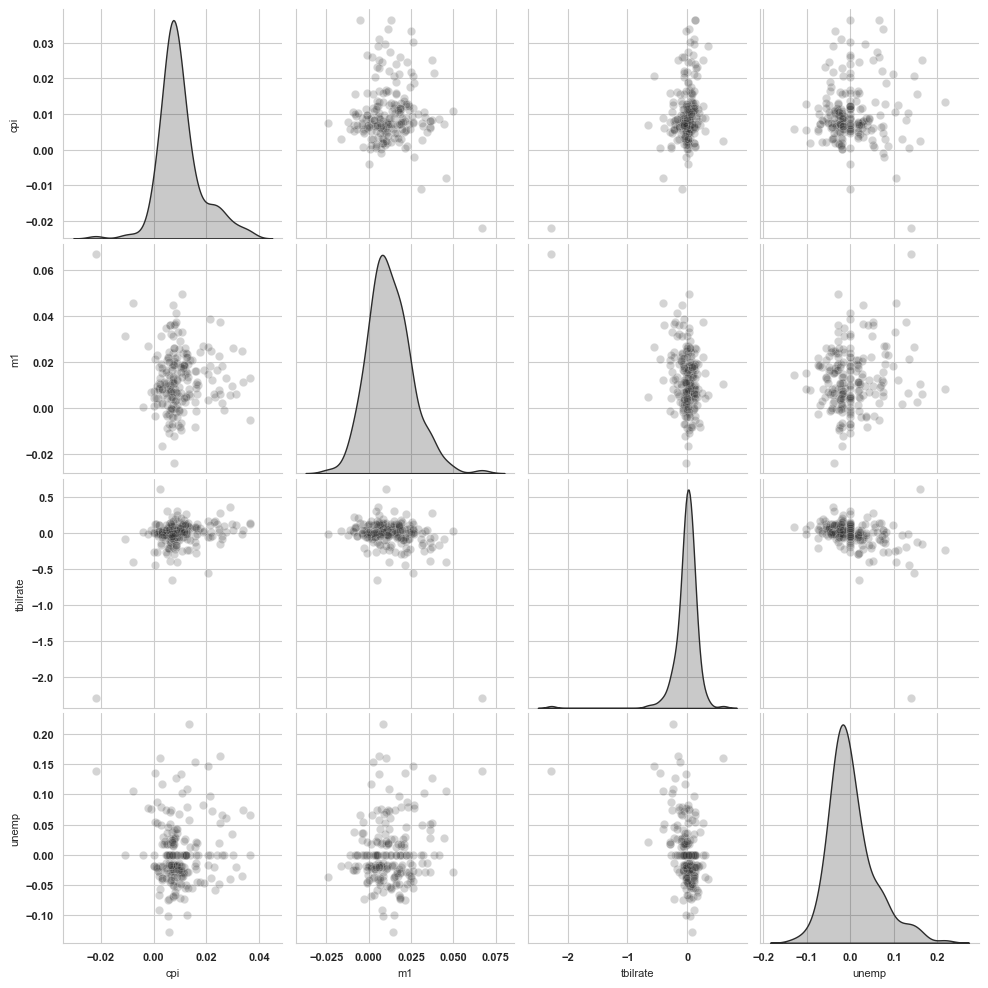

In [47]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2});

Quizás notes el argumento `plot_kws`. Esto nos permite transmitir opciones de configuración a las llamadas de trazado individuales en los elementos fuera
de la diagonal.

### Cuadrículas de facetas y datos categóricos
¿Qué pasa con los conjuntos de datos donde tenemos dimensiones de agrupación adicional? Una forma de visualizar datos con muchas variables
categóricas es utilizar una _cuadrícula de facetas_, que es un diseño bidimensional de gráficos donde los datos se dividen en los gráficos de cada eje en
función de los distintos valores de una determinada variable. seaborn tiene una útil función incorporada `catplot` que simplifica la cración
de muchos tipos de gráficos facetados divididos por variables categóricas:

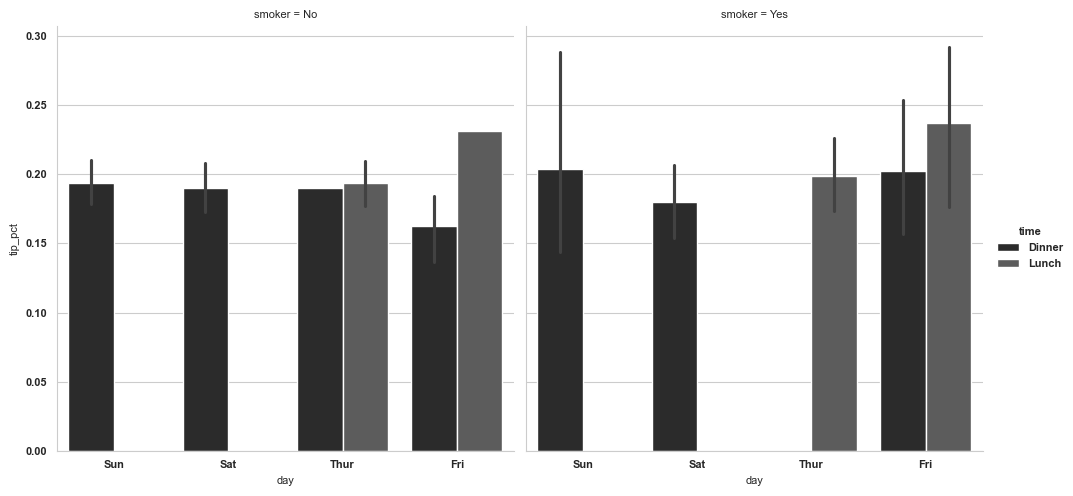

In [48]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
           kind="bar", data=tips[tips.tip_pct < 1]);

En lugar de agrupar por `time` por diferentes colores de barras dentro de una faceta, también podemos expandir la cuadrícula de facetas agregando
una fila `time` por valor.

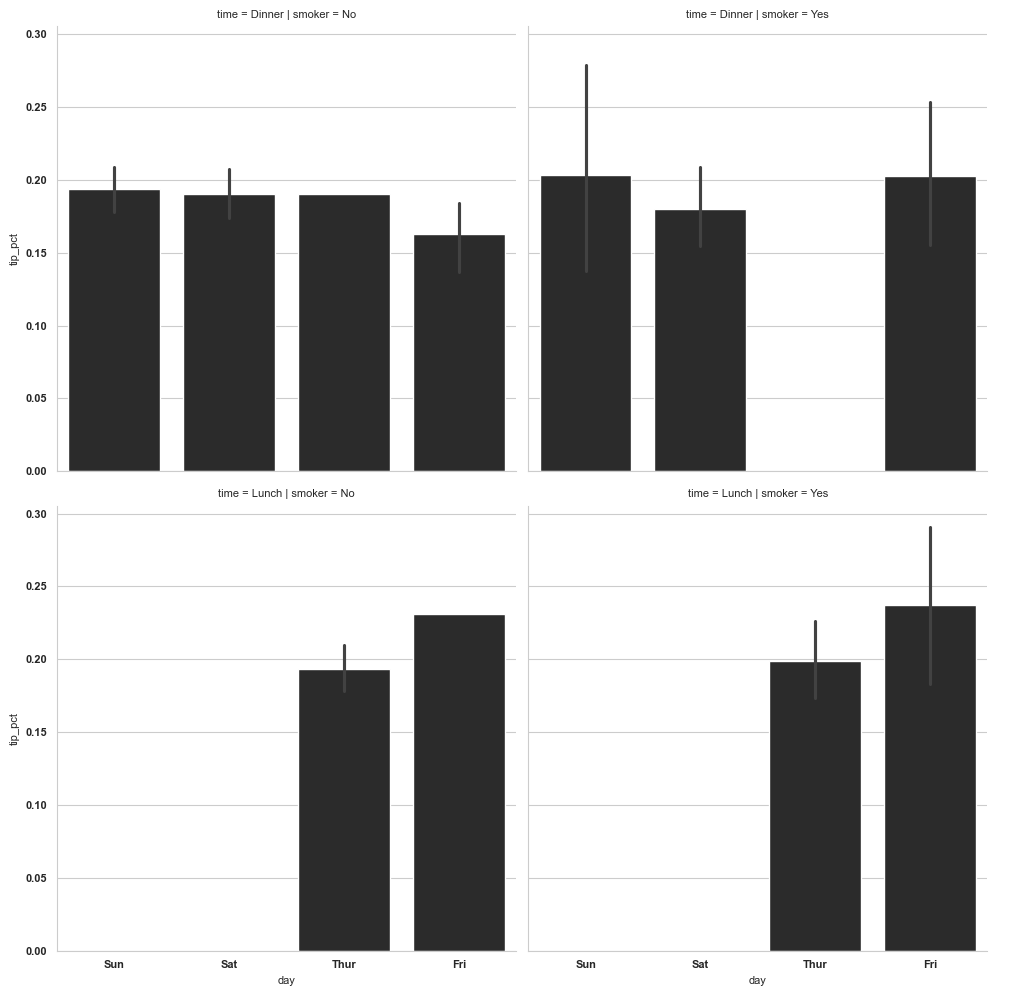

In [49]:
sns.catplot(x="day", y="tip_pct", row="time",
           col="smoker",
           kind="bar", data=tips[tips.tip_pct < 1]);

`catplot` admite otros tipos de gráficos que pueden resultar útiles según lo que intente mostrar. Por ejemplo, _los diagramas de caja_ (que
muestran la mediana, los cuartiles y los valores atípicos) pueden ser un tipo de visualización eficaz:

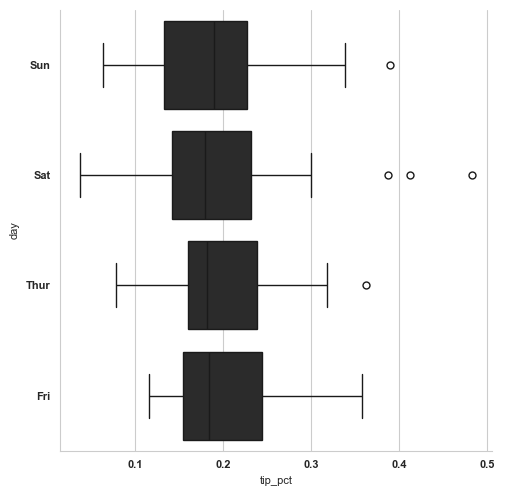

In [50]:
sns.catplot(x="tip_pct", y="day", kind="box",
           data=tips[tips.tip_pct < 0.5]);

[data visualization](https://clauswilke.com/dataviz)